# Quick Dataset Analysis
This notebook shows how to quickly analyze an image dataset for potential issues using fastdup.

## Installation & Setting Up

In [ ]:
!pip install pip -U
!pip install fastdup
!pip install pandas
!pip install matplotlib
!pip install wurlitzer
%load_ext wurlitzer

## Download Oxford Pets Dataset

In [ ]:
!wget https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz -O images.tar.gz
!tar xf images.tar.gz

# 1. Import fastdup

In [ ]:
import fastdup

# 2. Run fastdup on the pet images

In [ ]:
images_dir = 'images/'
work_dir = 'images_unlabeled/'

In [ ]:
# create and run fastdup
fd = fastdup.create(work_dir=work_dir, input_dir=images_dir)
fd.run(ccthreshold=0.9, threshold=0.8)

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.

 ########################################################################################

Dataset Analysis Summary: 

    Dataset contains 7384 images
    Valid images are 100.00% (7,384) of the data, invalid are 0.00% (0) of the data
    Similarity:  5.12% (378) belong to 11 similarity clusters (components).
    94.88% (7,006) images do not belong to any similarity cluster.
    Largest cluster has 24 (0.33%) images.
    For a detailed analysis, use `.connected_components()`
(similarity threshold used is 0.8, connected component threshold used is 0.9).

    Outliers: 6.13% (453) of images are possible outliers, and fall in the bottom 5.00% of similarity values.
    For a detailed list of outliers, use `.outliers(data=True)`.


# 3. Finding clusters of similar images

In [ ]:
# visualize clusters by size
fd.vis.component_gallery(sort_by='comp_size', max_width=700)

Output hidden; open in https://colab.research.google.com to view.

100%|██████████| 20/20 [00:00<00:00, 31.76it/s]


Finished OK. Components are stored as image files images_unlabeled/galleries/components_20230301102753/components_[index].jpg
Stored components visual view in  images_unlabeled/galleries/components_20230301102753/components.html
Execution time in seconds 0.9



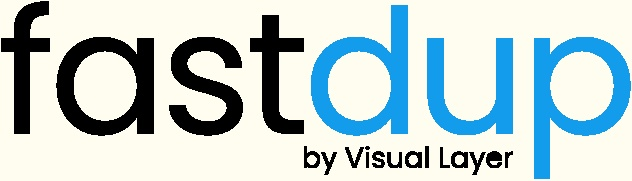
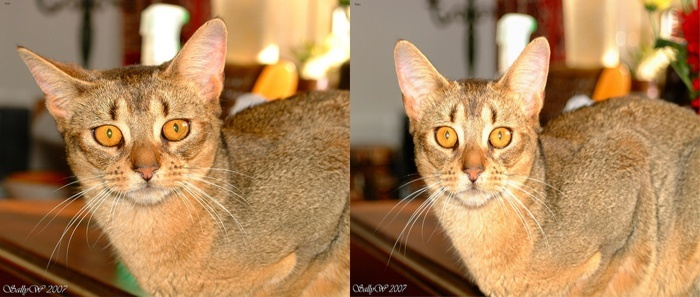
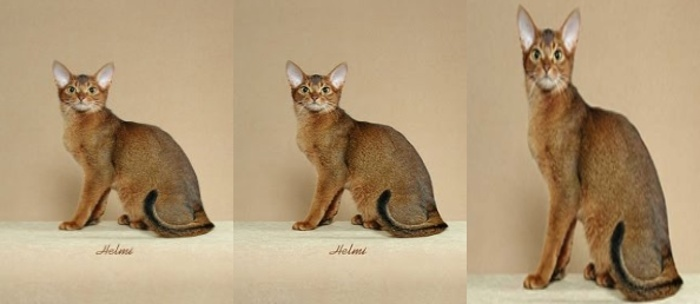
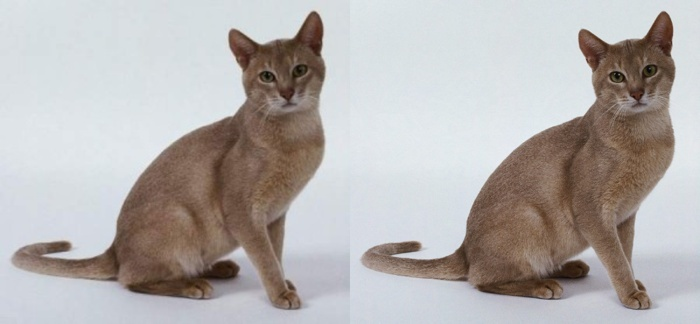
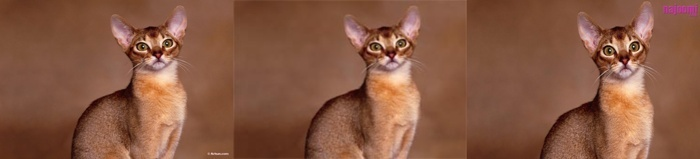
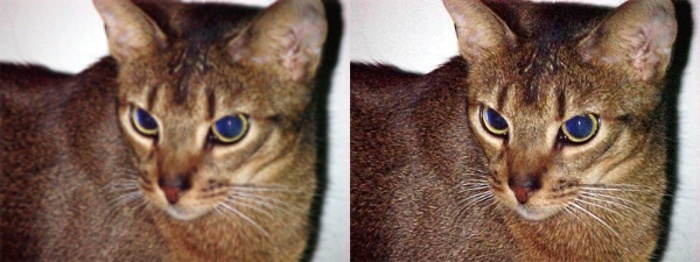
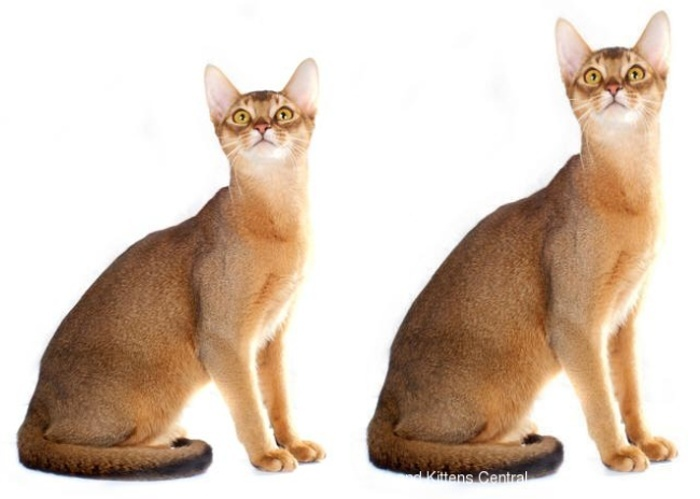
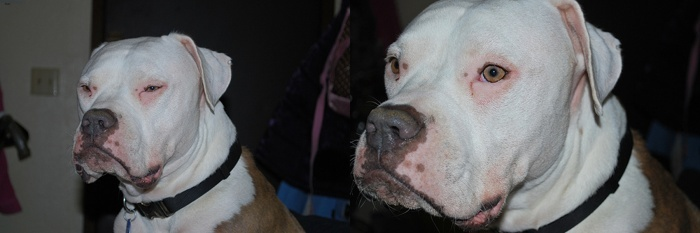
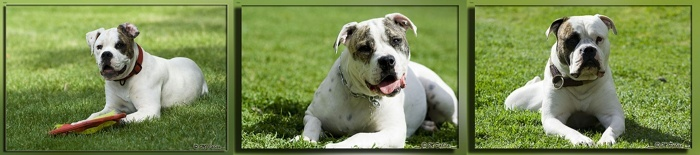
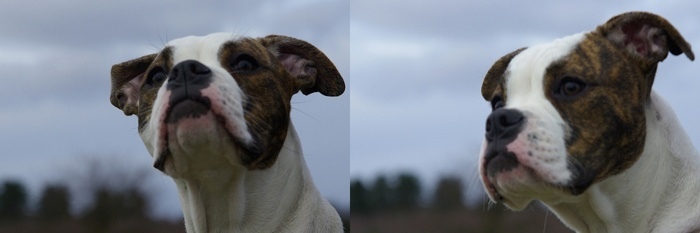
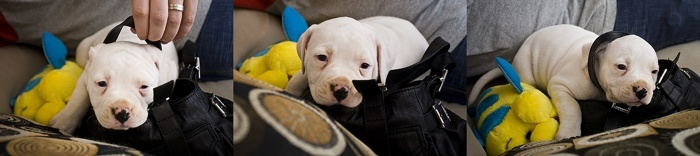
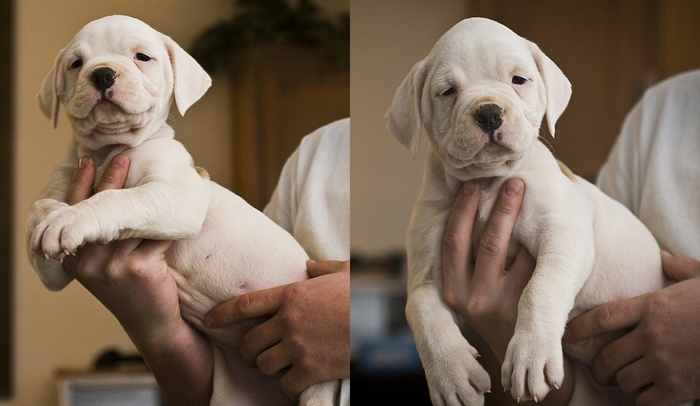
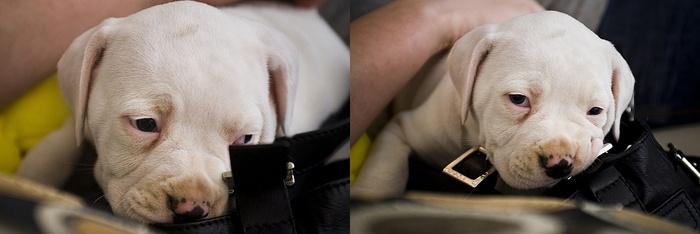
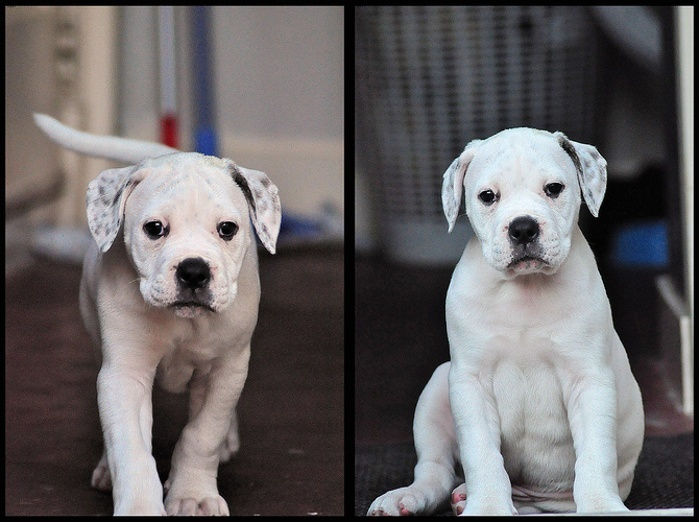
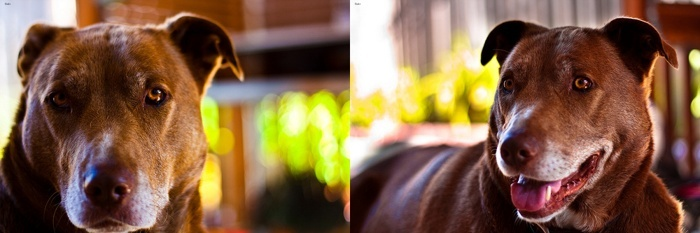
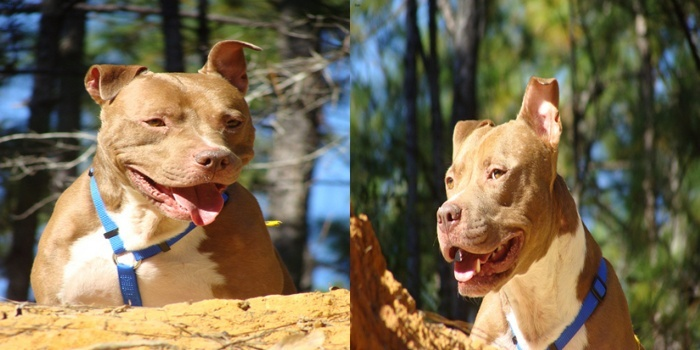
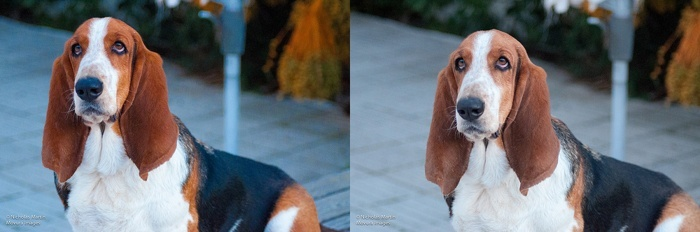
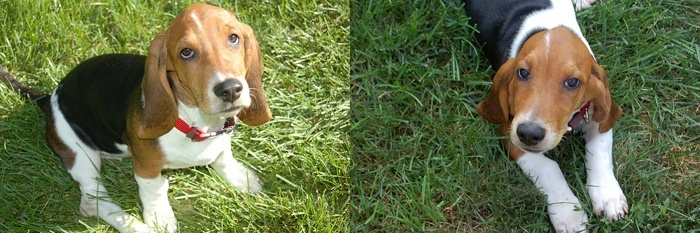
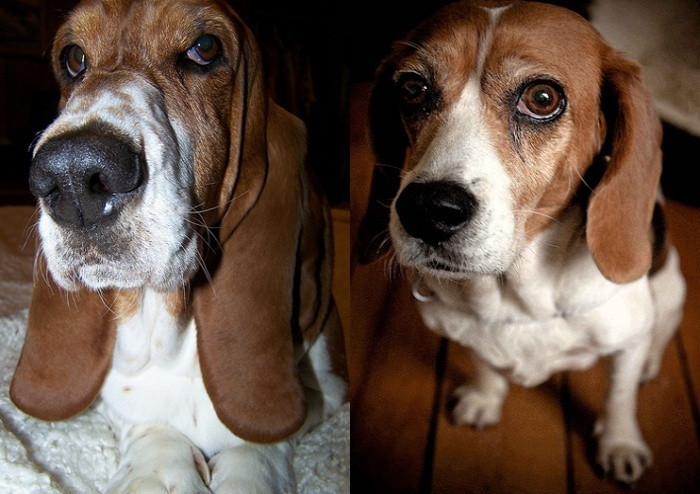
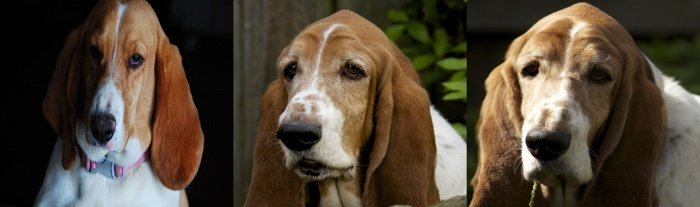
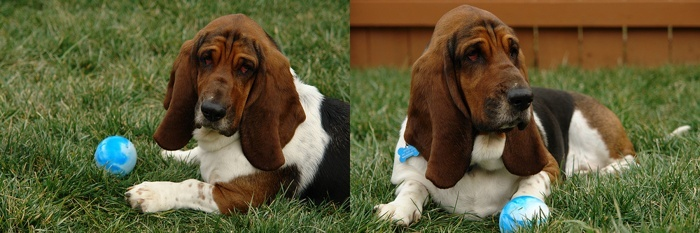

In [ ]:
# visualize clusters by similarity
fd.vis.component_gallery(sort_by='distance', max_width=700, min_items=2, ascending=False)

In [ ]:
# get connected components
cc_df, _ = fd.connected_components()
cc_df[cc_df.mean_distance > 0.99]
cc_df.sort_values(by=['count'], ascending=False).head(3)

fastdup_id  component_id      sum  count  mean_distance  min_distance  \
5807        5813          5462  22.1163   24.0         0.9215        0.9012   
5966        5972          5462  22.1163   24.0         0.9215        0.9012   
5914        5920          5462  22.1163   24.0         0.9215        0.9012   

      max_distance     img_filename error_code  is_valid  
5807        0.9407  samoyed_112.jpg      VALID      True  
5966        0.9407   samoyed_75.jpg      VALID      True  
5914        0.9407   samoyed_28.jpg      VALID      True

In [ ]:
# analyze connected components
agg_dict = {'img_filename': list, 'mean_distance': max}
duplicates_df = cc_df.groupby('component_id').agg(agg_dict)
duplicates_df = duplicates_df.sort_values(by=['mean_distance'], ascending=False)
duplicates_df.head(5)

img_filename  mean_distance
component_id                                                              
1438                        [Bombay_194.jpg, Bombay_32.jpg]            1.0
3525                     [keeshond_54.jpg, keeshond_59.jpg]            1.0
3267          [japanese_chin_137.jpg, japanese_chin_85.jpg]            1.0
2138           [Egyptian_Mau_131.jpg, Egyptian_Mau_202.jpg]            1.0
1441                        [Bombay_200.jpg, Bombay_85.jpg]            1.0

# 4. Finding outlier images in the data

100%|██████████| 20/20 [00:00<00:00, 10866.07it/s]


images_unlabeled/galleries/outliers_20230301102808/images_Bengal_105_1005.0.jpg.jpg
images_unlabeled/galleries/outliers_20230301102808/images_Bengal_131_1034.0.jpg.jpg
images_unlabeled/galleries/outliers_20230301102808/images_staffordshire_bull_terrier_51_6936.0.jpg.jpg
images_unlabeled/galleries/outliers_20230301102808/images_miniature_pinscher_76_4373.0.jpg.jpg
images_unlabeled/galleries/outliers_20230301102808/images_Sphynx_128_6620.0.jpg.jpg
images_unlabeled/galleries/outliers_20230301102808/images_beagle_142_843.0.jpg.jpg
images_unlabeled/galleries/outliers_20230301102808/images_american_pit_bull_terrier_72_571.0.jpg.jpg
images_unlabeled/galleries/outliers_20230301102808/images_german_shorthaired_173_2880.0.jpg.jpg
images_unlabeled/galleries/outliers_20230301102808/images_staffordshire_bull_terrier_76_6963.0.jpg.jpg
images_unlabeled/galleries/outliers_20230301102808/images_Bombay_36_1531.0.jpg.jpg
images_unlabeled/galleries/outliers_20230301102808/images_chihuahua_6_2166.0.jpg.jpg


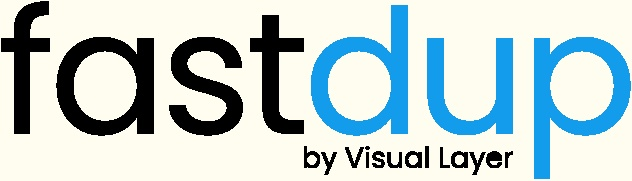
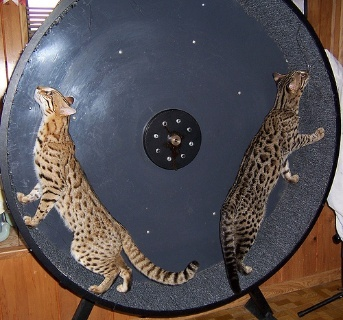
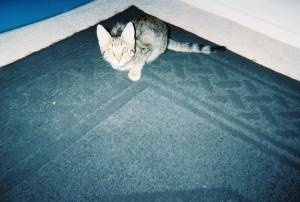
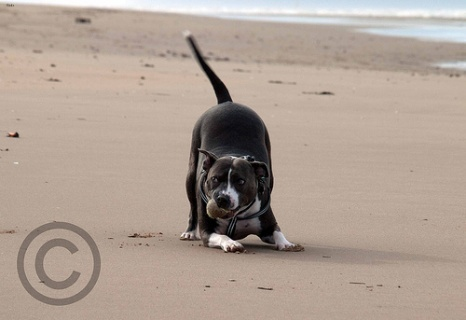
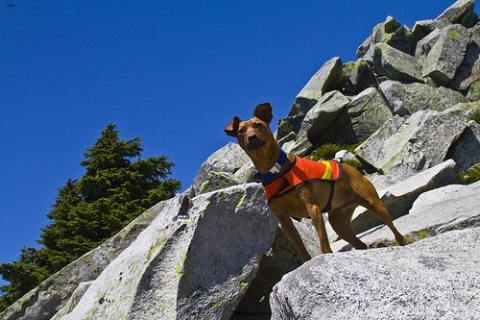
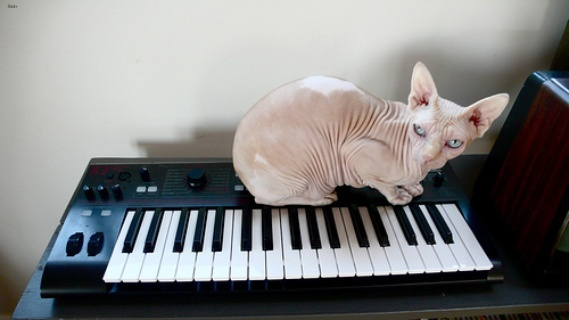
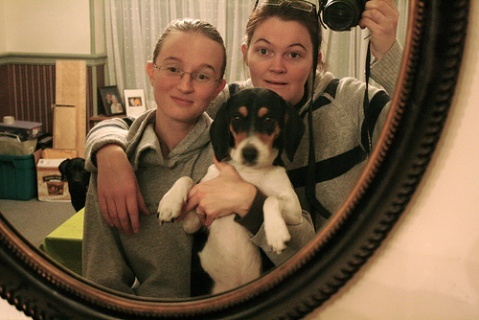
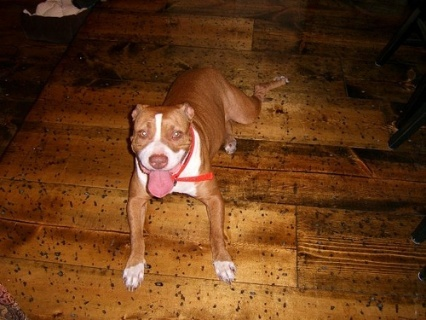
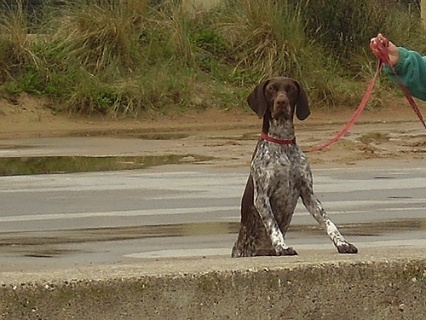
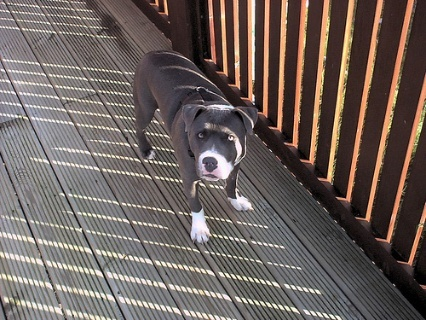
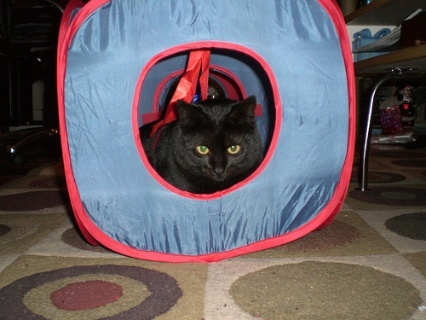
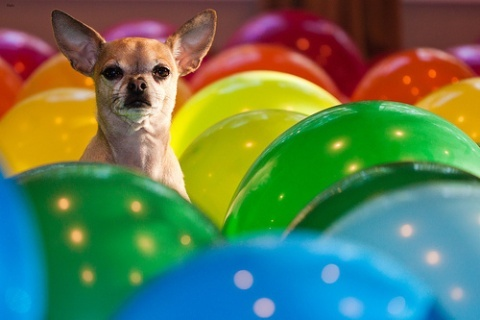
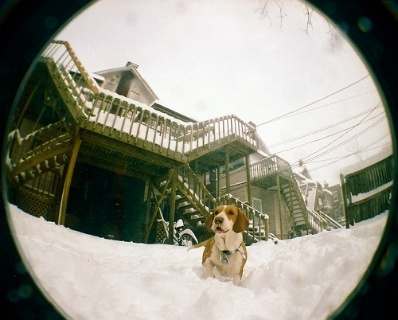
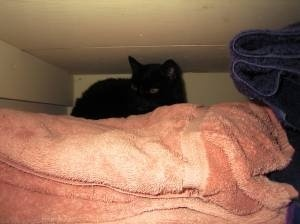
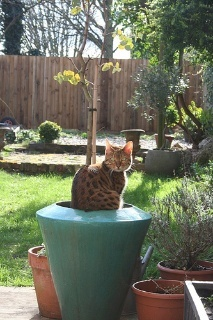
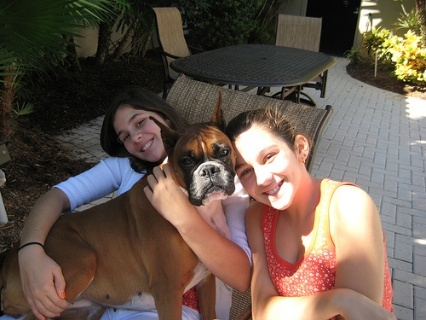
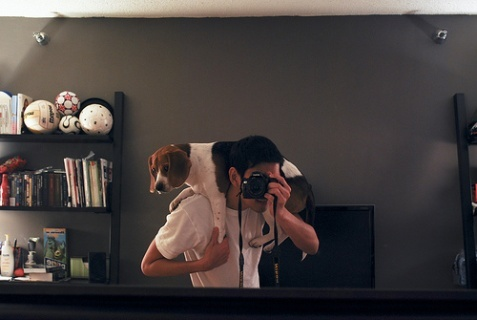
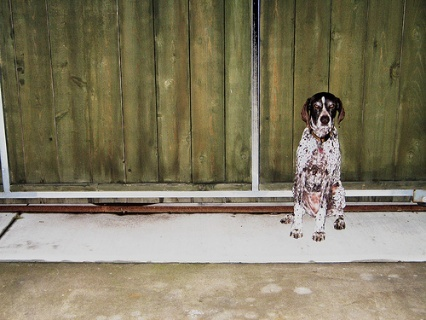
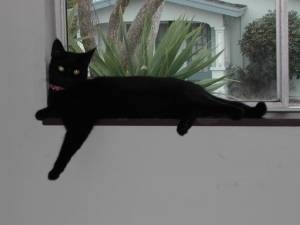
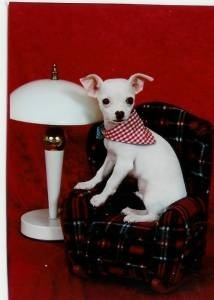
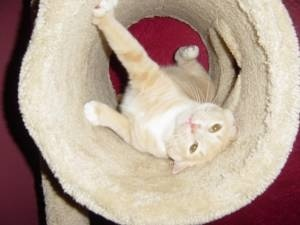

In [ ]:
# visualize outlier images
fd.vis.outliers_gallery()

## 4.b. Getting a detailed list

In [ ]:
# show stats for furthest outliers
fd.outliers().sort_values(by=['distance']).head(5)

index  outlier  nearest  distance               img_filename_outlier  \
0    737     1005     2926  0.596921                     Bengal_105.jpg   
1    735     1034     2367  0.611524                     Bengal_131.jpg   
2    734     6936     2116  0.617132  staffordshire_bull_terrier_51.jpg   
3    733     4373     6229  0.621796          miniature_pinscher_76.jpg   
4    732     6620     6629  0.622756                     Sphynx_128.jpg   

  error_code_outlier  is_valid_outlier       img_filename_nearest  \
0              VALID              True  german_shorthaired_33.jpg   
1              VALID              True         Egyptian_Mau_6.jpg   
2              VALID              True           chihuahua_24.jpg   
3              VALID              True          shiba_inu_128.jpg   
4              VALID              True             Sphynx_137.jpg   

  error_code_nearest  is_valid_nearest  
0              VALID              True  
1              VALID              True  
2              VALID              True  
3              VALID              True  
4              VALID              True

# 5. Visualize blurry, dark and bright images

100%|██████████| 25/25 [00:00<00:00, 233.20it/s]


Stored blur visual view in  images_unlabeled/galleries/stats_20230301102817/blur.html



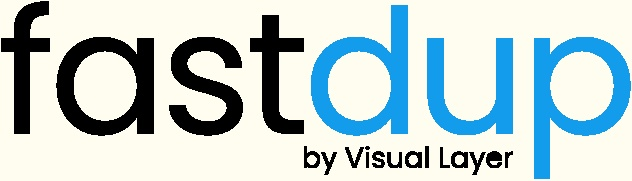
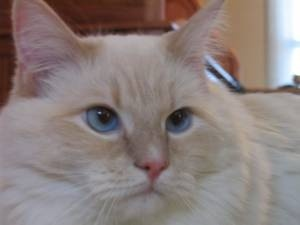
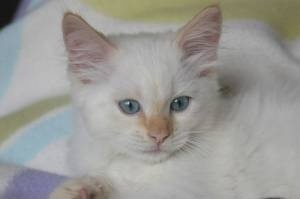
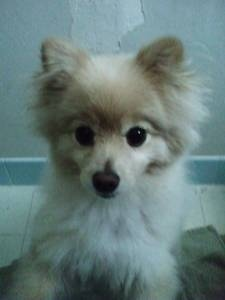
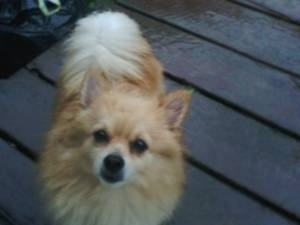
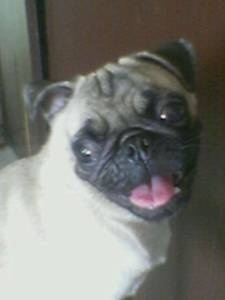
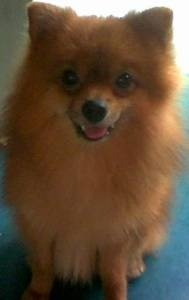
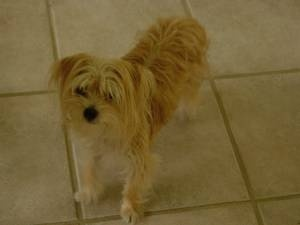
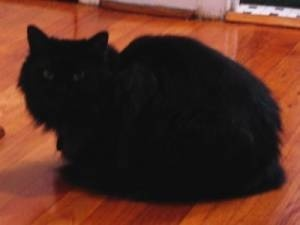
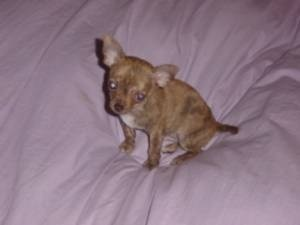
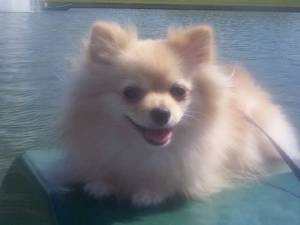
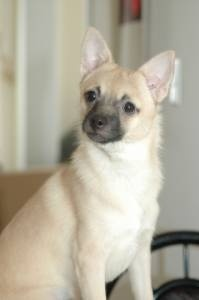
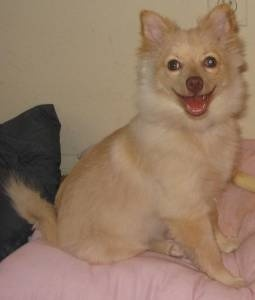
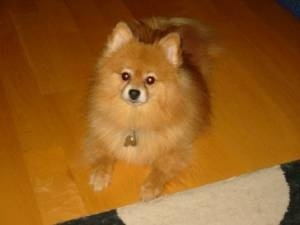
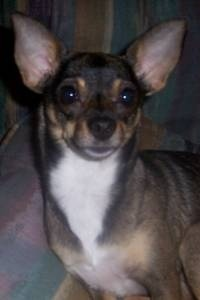
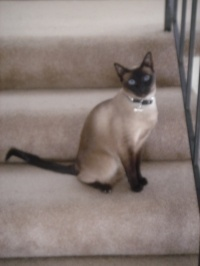
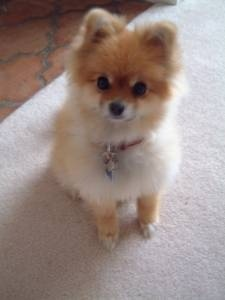
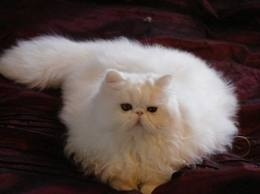
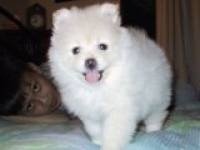
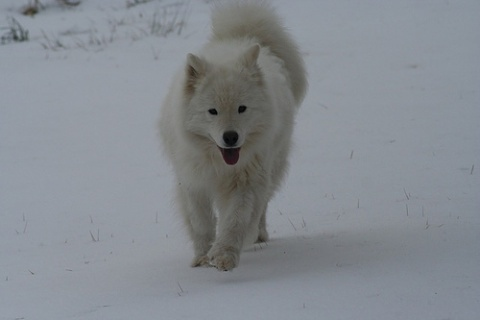
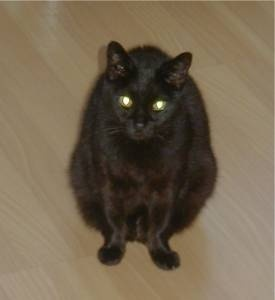
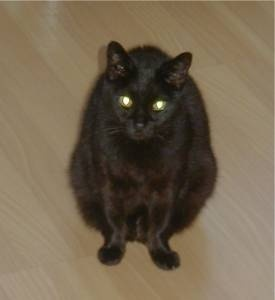
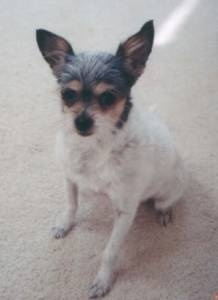
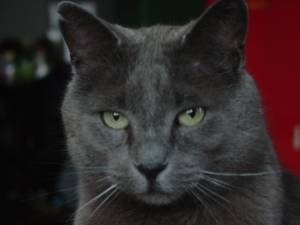
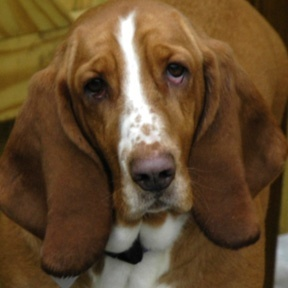
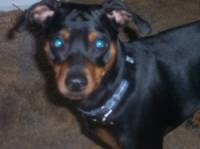

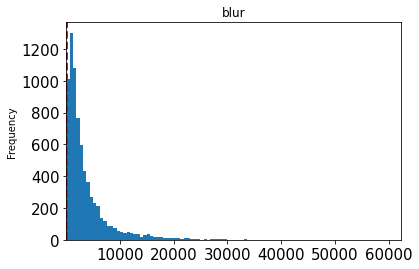

In [ ]:
# visualize blurry images
fd.vis.stats_gallery(metric='blur')

100%|██████████| 25/25 [00:00<00:00, 101.73it/s]


Stored mean visual view in  images_unlabeled/galleries/stats_20230301102825/mean.html



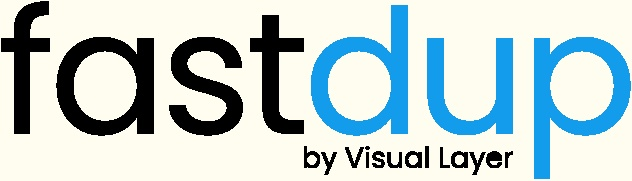
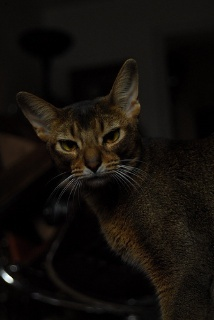
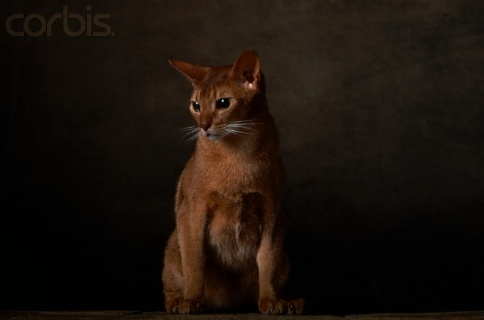
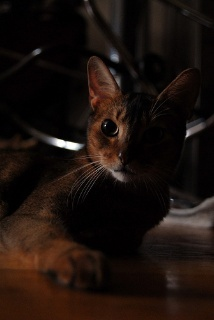
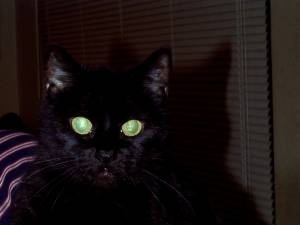
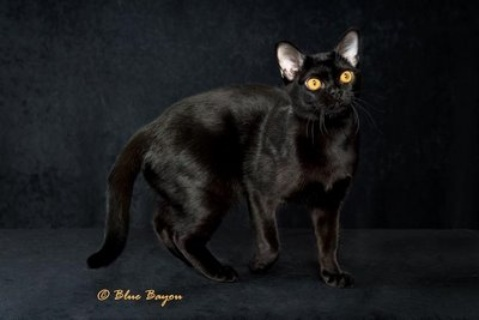
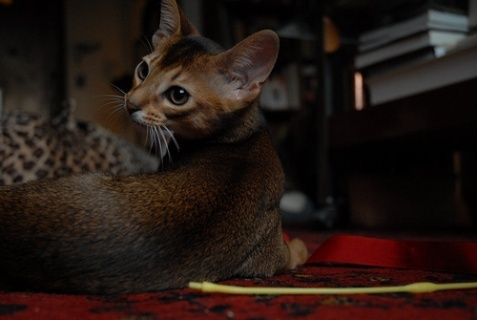
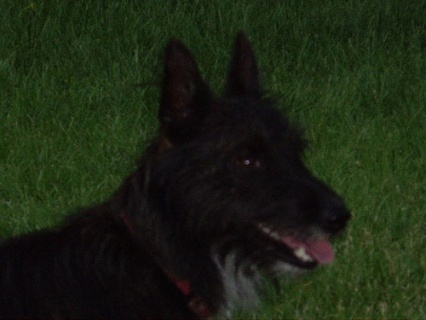
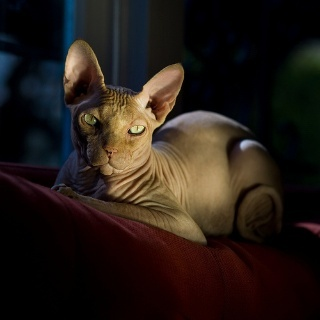
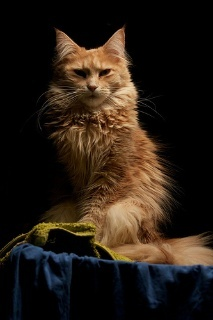
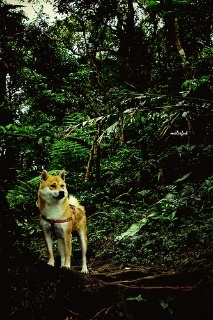
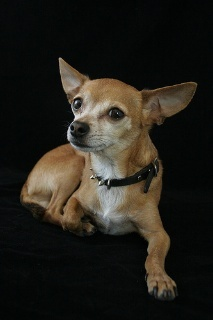
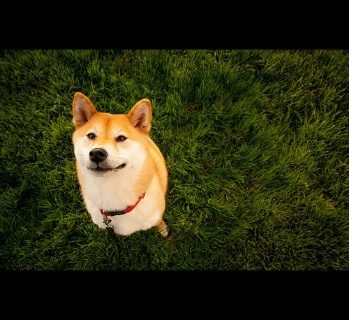
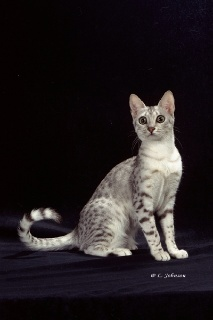
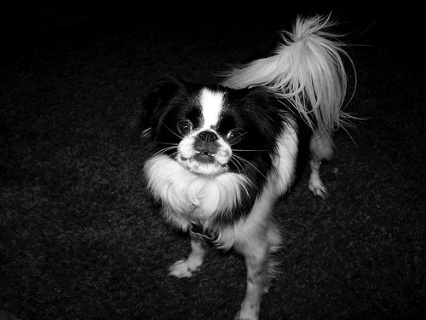
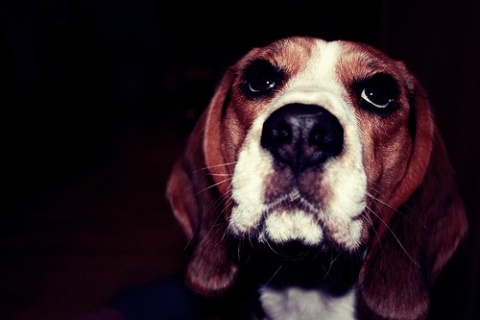
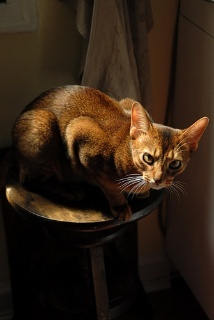
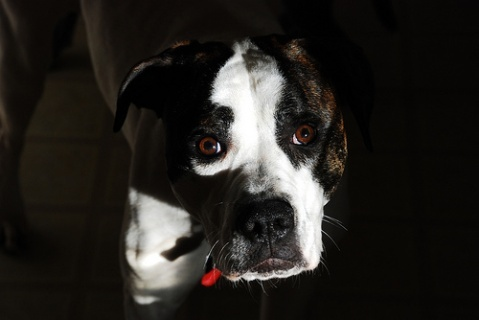
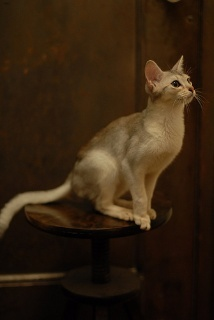
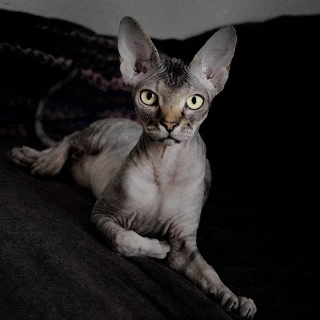
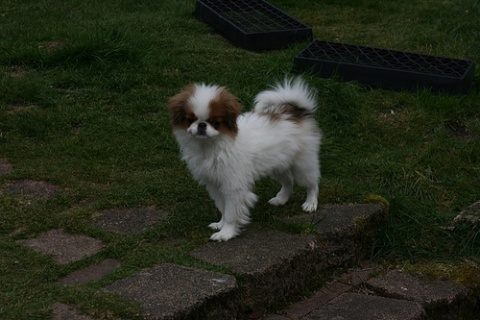
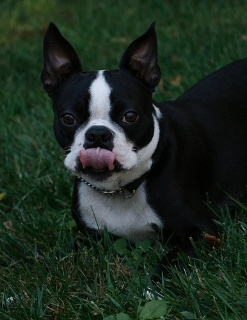
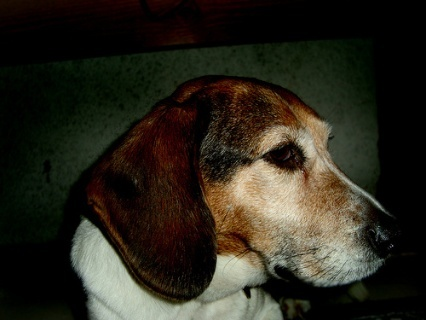
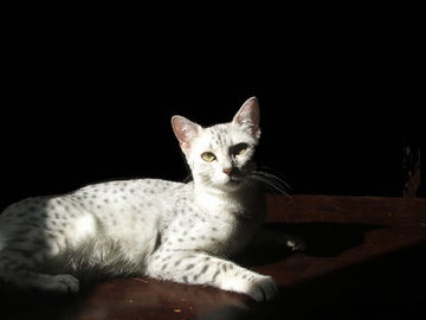
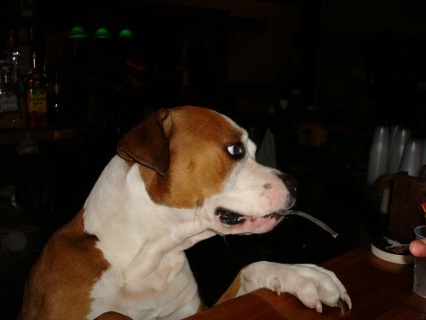
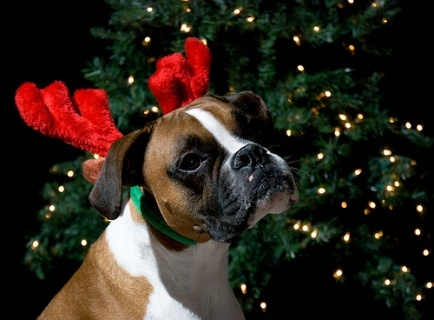

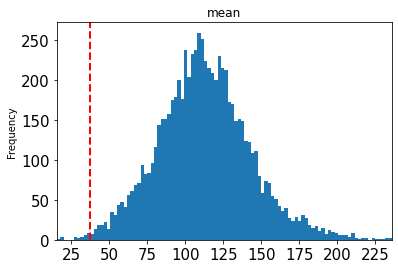

In [ ]:
# visualize dark images
fd.vis.stats_gallery(metric='dark')

100%|██████████| 25/25 [00:00<00:00, 131.82it/s]


Stored mean visual view in  images_unlabeled/galleries/stats_20230301102839/mean.html



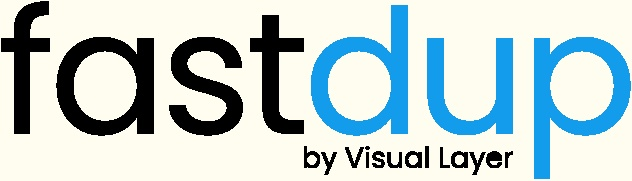
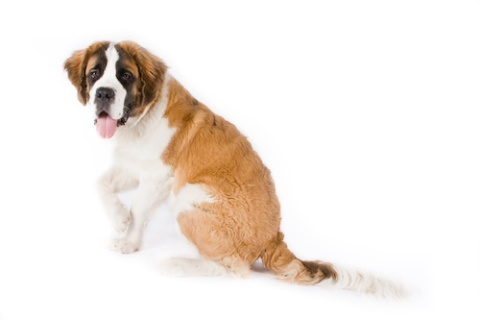
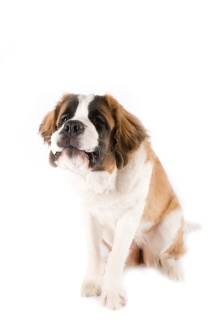
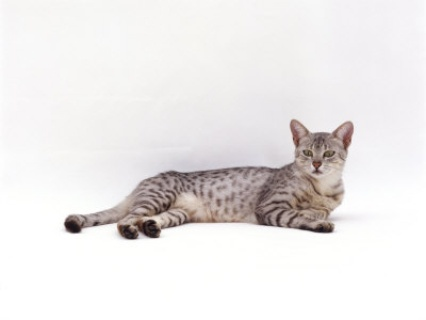
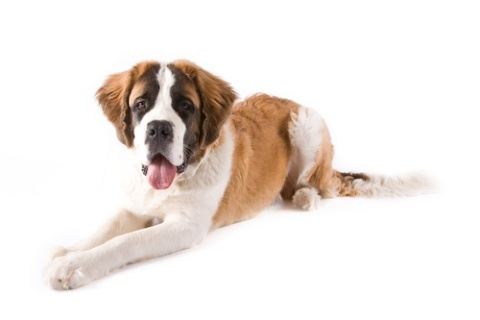
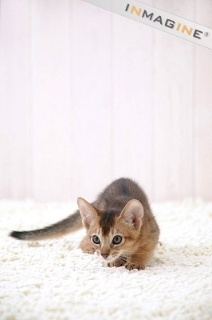
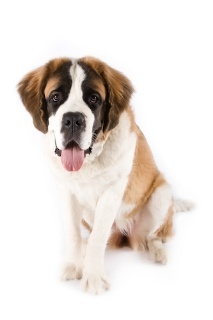
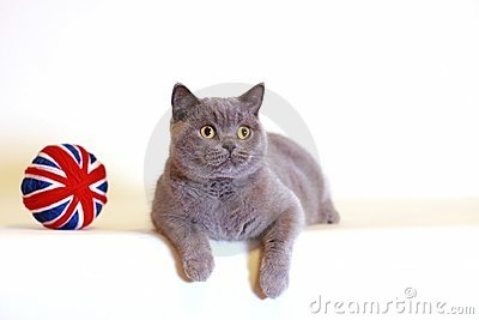
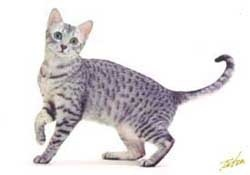
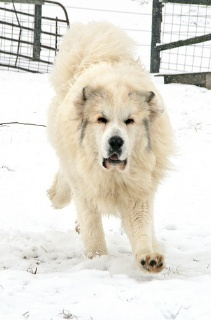
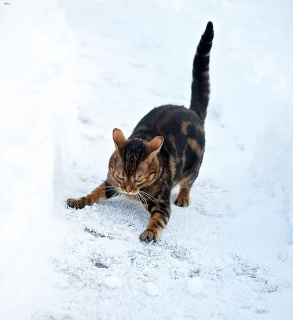
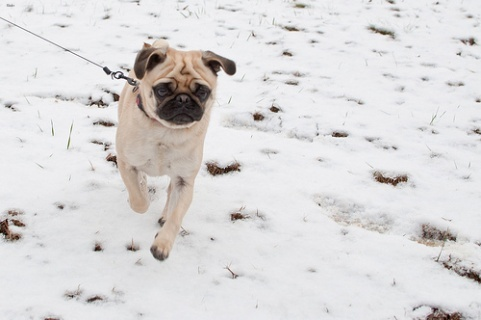
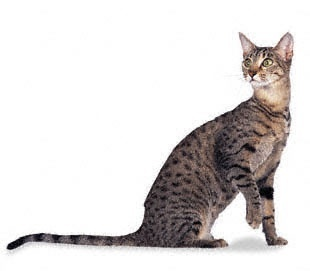
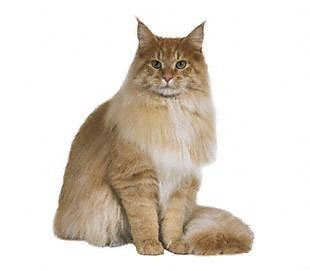
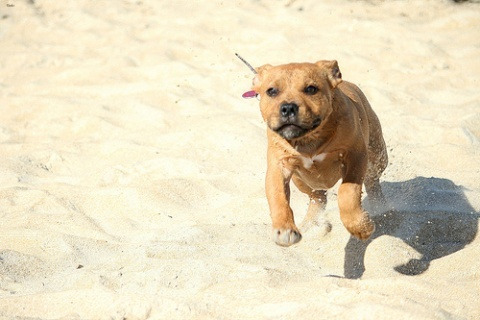
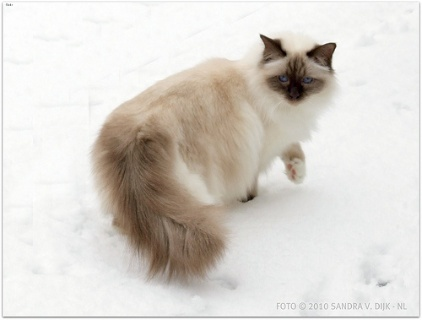
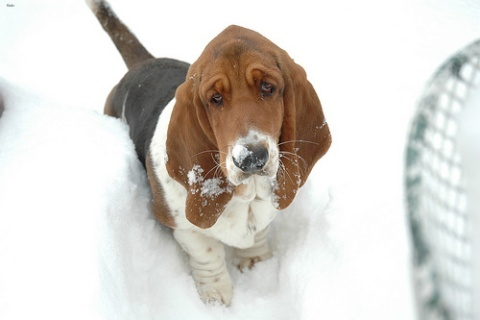
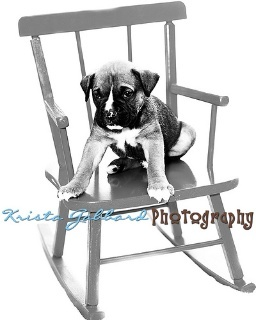
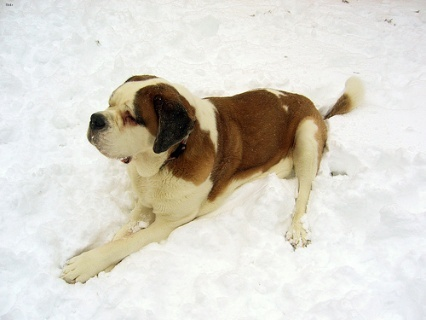
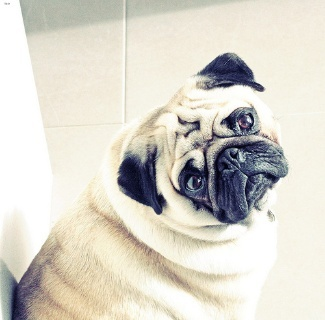
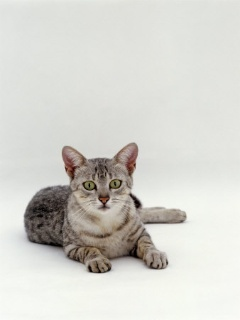
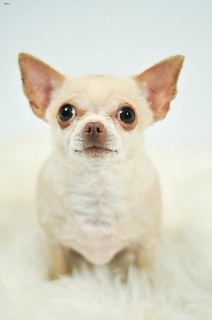
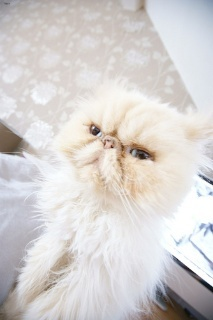
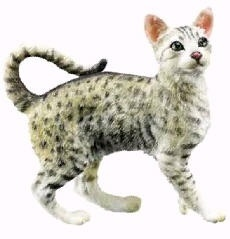
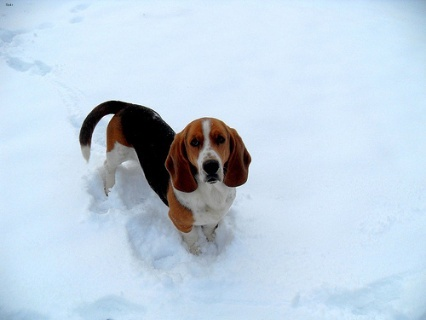
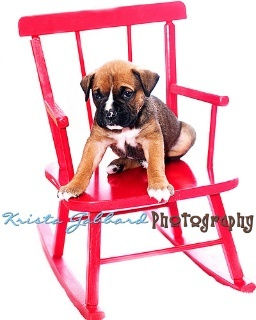

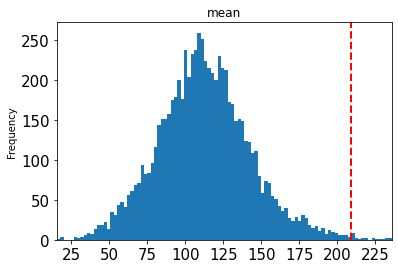

In [ ]:
# visualize bright images
fd.vis.stats_gallery(metric='bright')

In [ ]:
# show image statistics
fd.img_stats().head(5)

fastdup_id  img_w  img_h  unique       blur      mean  min    max     stdv  \
0           0    394    500       0  4120.0146  142.0682  0.0  255.0  84.0555   
1           1    450    313       0  2440.4067  128.6538  0.0  255.0  78.9571   
2           2    500    465       0  4965.8892  127.4869  0.0  255.0  57.4010   
3           3    500    351       0  2838.8103  139.9199  0.0  255.0  71.9906   
4           4    600    363       0  1131.4061  118.3033  0.0  255.0  39.1263   

   file_size  contrast        img_filename error_code  is_valid  
0     126923       1.0  Abyssinian_100.jpg      VALID      True  
1      49023       1.0  Abyssinian_101.jpg      VALID      True  
2     165505       1.0  Abyssinian_102.jpg      VALID      True  
3     132937       1.0  Abyssinian_103.jpg      VALID      True  
4      34907       1.0  Abyssinian_104.jpg      VALID      True